In [1]:
# Загрузим библиотеки

import pandas as pd
import numpy as np
import seaborn as sns

import category_encoders as ce
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
from sklearn import set_config
set_config(display='diagram')
import tkinter
import PyQt5


from pylab import rcParams
from sklearn import set_config

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import make_classification
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport

from pickle import dump, load

import streamlit as st


C:\Users\User\AppData\Local\Temp\ipykernel_10528\251198393.py:43: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Настроим точность вывода до 2-х десятичных знаков и разделители тысяч (групп разрядов) для больших чисел

pd.set_option('display.float_format', '{:,.2f}'.format)

# Настроим количество выводимых столбцов

pd.set_option('display.max_columns', 50)

# Зададим размеры фигуры для вывода графиков и гистограмм

rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['figure.dpi'] = 80

# Настроим местоположение и размер шрифта для легенды графиков и гистограмм

rcParams['legend.loc'] = 'lower right'
rcParams['legend.fontsize'] = 12

In [3]:
# Вынесем постоянные параметры

SEED = 19221981

In [4]:
# Загрузим данные

df_train = pd.read_csv('C:/Users/User/Desktop/Kaggle/train.csv')
df_test = pd.read_csv('C:/Users/User/Desktop/Kaggle/test.csv')


In [5]:
# Посмотрим на данные

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# Проверим на пропуски

report = df_train.isna().sum().to_frame()
report = report.rename(columns={0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df_train.shape[0]).round(2)
report.sort_values(by='missing_values', ascending=False)

missing_values  % of total
id                        0        0.00
age                       0        0.00
gender                    0        0.00
height                    0        0.00
weight                    0        0.00
ap_hi                     0        0.00
ap_lo                     0        0.00
cholesterol               0        0.00
gluc                      0        0.00
smoke                     0        0.00
alco                      0        0.00
active                    0        0.00
cardio                    0        0.00

In [7]:
# Проверим на дубликаты

df_train.duplicated().sum()


0

In [8]:
# Посмотрим на каждый столбец подробнее

profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file('your_report.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def show_num_features(df, col_title, num_bins):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title(col_title + '. Плотность распределения', fontsize=14)
    axes[0].set_ylabel('плотность')
    axes[1].set_title(col_title + '. Ящик с усами', fontsize=14)
    axes[1].set_ylabel('значения')
    sns.histplot(df, bins=num_bins, ax=axes[0])
    sns.boxplot(data=df, ax=axes[1])
    plt.show()
    return

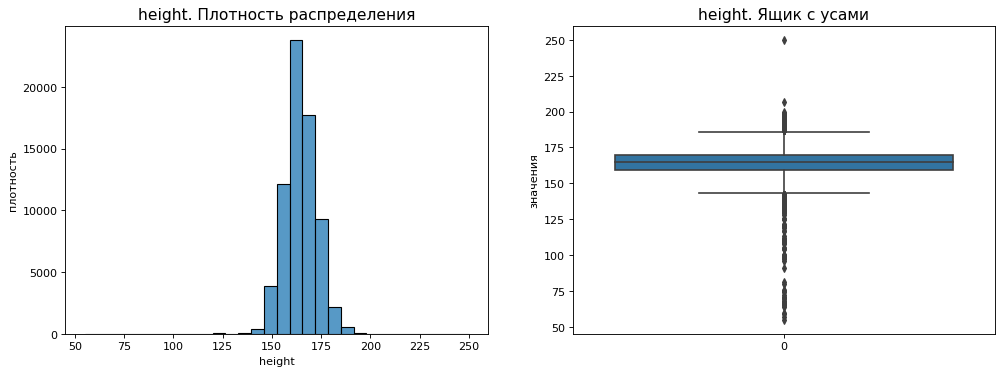

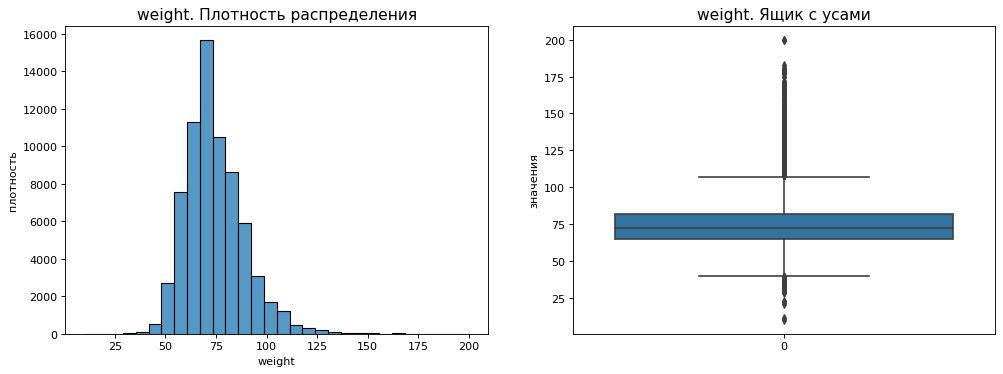

In [10]:
num_columns_lst = ['height', 'weight']

for column in df_train[num_columns_lst]:
    show_num_features(df_train[column], column, num_bins=30)

In [11]:
# Посмотрим строки с ростом меньше 100

df_train.loc[df_train['height']<100]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
224      309  21800       2      76   55.00    120     80            1     1   
7598   10843  14661       2      70   72.00    120      8            1     1   
8171   11662  17646       2      97  170.00    160    100            1     1   
12770  18218  19594       1      75  168.00    120     80            1     1   
13265  18928  22456       2      71   68.00    120     80            3     1   
14323  20459  22005       1      67   57.00    120     90            1     1   
15167  21686  15812       1      70   68.00    120     80            1     1   
16699  23859  19680       2      74   98.00    140     90            1     1   
17277  24690  17530       1      98   45.00     12     80            1     1   
22542  32207  14538       1      68   65.00    100     60            1     1   
22723  32456  23386       1      55   81.00    130     90            1     1   
23913  34186  19074       1      81  156.00    140     90            1     1   
27384  39156  15292       1      80  178.00    140     90            3     3   
27603  39462  20978       1      64   61.00    130     70            1     1   
28737  41075  19747       1      91   55.00    140     90            1     1   
29157  41661  19088       1      60   69.00    110     70            1     1   
32098  45832  15374       1      72   74.00    150     90            1     1   
33607  48009  19709       2      65   72.00    130     80            1     1   
44490  63545  19120       1      65   60.00    120     80            1     1   
46319  66161  21006       2      68   71.00    120     80            1     1   
47352  67631  23297       1      75   75.00    120     80            1     1   
50789  72476  14499       2      67   60.00    110     80            1     1   
51459  73386  15432       2      70   69.00    120     80            1     1   
53344  76116  20541       2      67   80.00    120     80            1     1   
56022  79917  21171       1      96   59.00     90     60            1     1   
64115  91523  18426       1      59   57.60    125     67            1     1   
64454  92008  21348       1      66   63.00     12     80            1     1   
65302  93223  18467       1      99   60.00     90     60            1     1   
66643  95141  18830       1      57   61.00    130     90            1     1   

       smoke  alco  active  cardio  
224        0     0       1       0  
7598       0     0       1       0  
8171       1     0       1       1  
12770      1     0       1       1  
13265      0     0       1       0  
14323      0     0       1       1  
15167      0     0       0       0  
16699      0     0       1       1  
17277      0     0       1       0  
22542      0     0       0       0  
22723      0     0       1       1  
23913      0     0       1       0  
27384      0     0       1       1  
27603      0     0       1       0  
28737      0     0       1       1  
29157      0     0       0       0  
32098      0     0       1       1  
33607      0     0       0       0  
44490      0     0       1       0  
46319      0     0       1       0  
47352      0     0       1       0  
50789      1     1       1       0  
51459      0     0       0       0  
53344      0     0       0       1  
56022      0     0       1       1  
64115      0     0       0       0  
64454      0     0       0       1  
65302      0     0       1       0  
66643      0     0       1       1

In [12]:
# Строки с ростом меньше 100 увеличим на 100

df_train.loc[df_train['height']<100, 'height'] = df_train['height']+100

In [13]:
df_train.loc[df_train['height']<=100]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
3420    4838  14516       1     100   70.00    100     70            1     1   
17074  24396  21259       1     100   86.00    110     70            1     1   
58868  84021  14680       2     100   60.00    100     60            1     1   

       smoke  alco  active  cardio  
3420       0     0       1       0  
17074      0     0       1       1  
58868      0     0       1       0

In [14]:
# Найдем медиану роста

height_med = df_train['height'].median()
print(height_med)

165.0


In [15]:
# Заменим cтроки в которых рост больше и меньше 145 медианой

df_train.loc[(df_train['height']>=100) & (df_train['height']<145), 'height'] = height_med


In [16]:
df_train.loc[(df_train['height']>100) & (df_train['height']<145)]

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []

In [17]:
# Удалим строки где рост боьше 190

df_train = df_train.loc[df_train['height']<190]

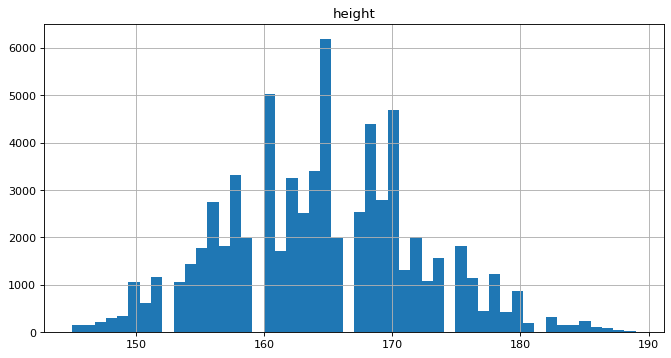

In [18]:
# Построим гистограмму

df_train.hist('height', bins=50)
plt.show()

c:\Users\User\anaconda3\envs\ds_practicum_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


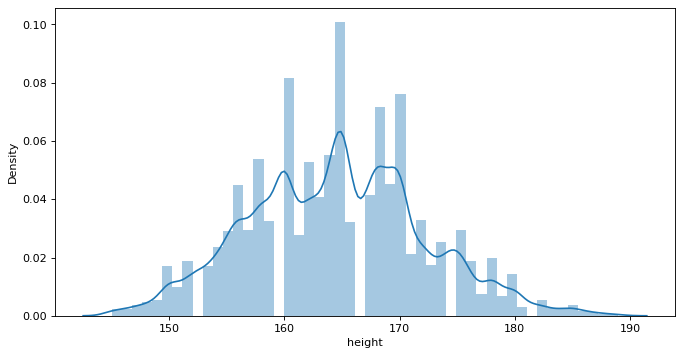

In [19]:
sns.distplot(df_train['height'], hist=True)
plt.xlabel='height'
plt.ylabel='count'
plt.show()

In [20]:
# Создадим функцию построения ящика с усами

def boxplot(emissions):
    plt.boxplot(emissions)
    plt.show()

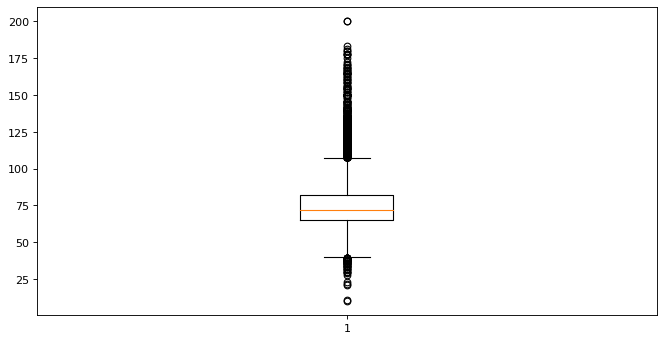

In [21]:
boxplot(df_train['weight'])

In [22]:
# Посмотрим статистики

df_train['weight'].describe()

count   69,890.00
mean        74.18
std         14.36
min         10.00
25%         65.00
50%         72.00
75%         82.00
max        200.00
Name: weight, dtype: float64

In [23]:
df_train.loc[df_train['weight']<45]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
360      506  19803       1  165.00   44.00    130     80            1     1   
383      543  19517       1  147.00   41.00     80     50            1     1   
837     1168  14659       1  148.00   42.00     90     60            1     1   
1574    2230  19840       1  163.00   43.00    120     80            1     2   
2262    3187  15285       1  152.00   40.00    110     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69522  99292  19770       1  155.00   43.00    120     80            1     1   
69734  99600  22505       1  156.00   43.00    150    100            1     1   
69784  99673  17541       1  165.00   44.00    100     70            1     1   
69851  99765  14683       1  150.00   42.00     90     60            1     1   
69908  99856  14823       1  152.00   42.00    120     80            1     1   

       smoke  alco  active  cardio  
360        0     0       1       0  
383        0     0       1       0  
837        0     0       1       0  
1574       0     0       1       0  
2262       0     0       1       0  
...      ...   ...     ...     ...  
69522      0     0       1       0  
69734      0     0       1       1  
69784      0     0       1       0  
69851      0     0       1       0  
69908      0     0       1       0  

[302 rows x 13 columns]

In [24]:
# Найдем медиану веса

weight_med = df_train['weight'].median()
print(weight_med)

72.0


In [25]:
# Заменим строки в коорых вес меньше 45 на медианное значение

df_train.loc[df_train['weight']<45, 'weight'] = weight_med


c:\Users\User\anaconda3\envs\ds_practicum_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
df_train.loc[df_train['weight']<40]

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []

In [27]:
df_train.loc[df_train['weight']>115]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
338      474  21078       1  157.00  142.00    120     80            1     1   
389      552  16718       2  165.00  169.00    120     80            1     1   
390      553  16772       1  170.00  116.00    130     70            1     1   
435      618  16765       1  186.00  200.00    130     70            1     1   
446      634  21237       2  178.00  120.00    160     90            1     3   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69012  98584  18317       1  170.00  123.00    130     90            1     1   
69060  98640  18924       1  163.00  119.00    160     90            1     1   
69109  98709  19077       2  175.00  155.00    110    100            1     1   
69440  99182  23141       2  180.00  123.00    190     99            2     1   
69996  99995  22601       1  158.00  126.00    140     90            2     2   

       smoke  alco  active  cardio  
338        0     0       1       1  
389        0     0       1       0  
390        0     0       1       0  
435        0     0       0       0  
446        0     0       1       1  
...      ...   ...     ...     ...  
69012      0     0       1       0  
69060      0     0       1       1  
69109      0     0       1       1  
69440      0     0       0       1  
69996      0     0       1       1  

[788 rows x 13 columns]

In [28]:
# Заменим строки с весом больше 115 на медианное значение

df_train.loc[df_train['weight']>115, 'weight'] = weight_med

c:\Users\User\anaconda3\envs\ds_practicum_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
# Расчитаем индекс массы тела, чтобы избавиться от шума

df_train['bmi'] = df_train['weight']/((df_train['height']/100)**2)


C:\Users\User\AppData\Local\Temp\ipykernel_10528\2953474750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bmi'] = df_train['weight']/((df_train['height']/100)**2)


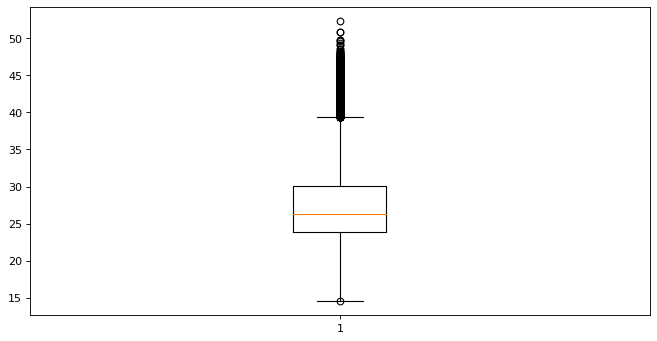

In [30]:
boxplot(df_train['bmi'])

In [31]:
df_train.loc[df_train['bmi']>41]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
30        42  18291       1  155.00  105.00    120     80            3     1   
83       114  19570       1  152.00  110.00    160     90            1     1   
261      358  21059       1  154.00   98.00    140     90            2     1   
267      366  17460       1  165.00  115.00    150    100            1     1   
473      680  15226       1  150.00   95.00    150   1033            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69406  99140  18435       1  156.00   99.90    120     80            1     1   
69588  99399  18864       1  155.00  101.00    140     80            3     2   
69708  99562  21357       1  165.00  115.00    140     90            1     1   
69946  99925  21333       1  164.00  115.00    130     80            1     1   
69985  99977  18194       1  156.00  102.00    130     80            1     1   

       smoke  alco  active  cardio   bmi  
30         0     0       1       1 43.70  
83         0     0       1       1 47.61  
261        0     0       1       0 41.32  
267        0     0       1       1 42.24  
473        0     0       1       1 42.22  
...      ...   ...     ...     ...   ...  
69406      0     0       1       0 41.05  
69588      0     0       1       1 42.04  
69708      0     1       0       1 42.24  
69946      0     0       1       1 42.76  
69985      0     1       0       1 41.91  

[788 rows x 14 columns]

In [32]:
# Удалим все строки со значением больше bmi 41

df_train = df_train.loc[df_train['bmi']<41]

In [33]:
def show_num_features(df, col_title, num_bins):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title(col_title + '. Плотность распределения', fontsize=16)
    axes[0].set_ylabel('плотность')
    axes[1].set_title(col_title + '. Ящик с усами', fontsize=16)
    axes[1].set_ylabel('значения')
    sns.histplot(df, bins=num_bins, ax=axes[0])
    sns.boxplot(data=df, ax=axes[1])
    plt.show()
    return

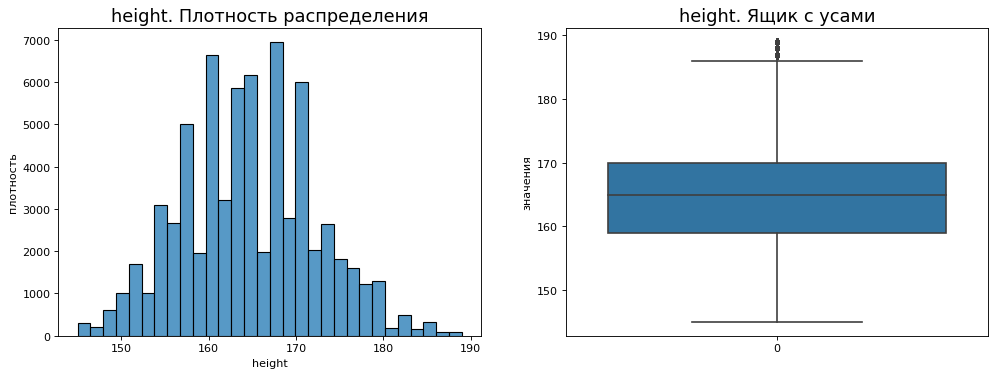

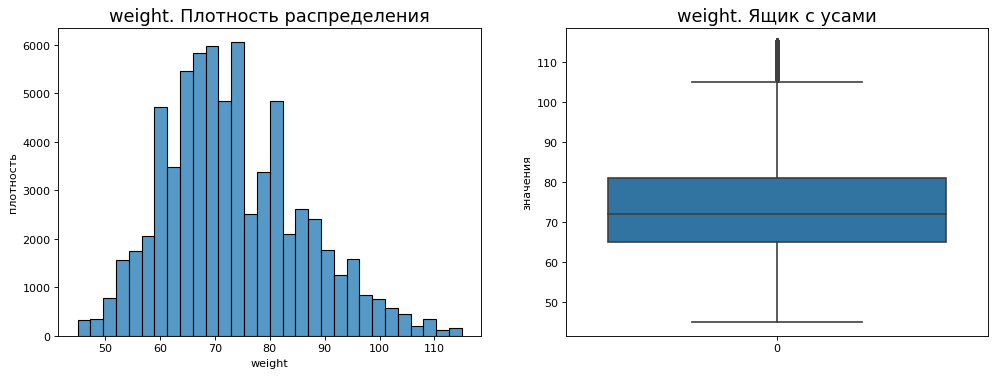

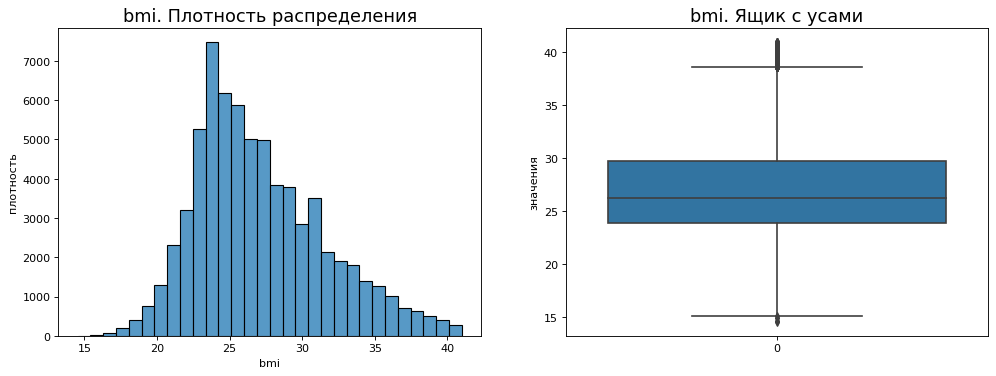

In [34]:
num_columns_lst = ['height', 'weight', 'bmi']

for column in df_train[num_columns_lst]:
    show_num_features(df_train[column], column, num_bins=30)

In [35]:
# Посмотрим на значения верхнее давление которых меньше 0

df_train.loc[df_train['ap_hi'] < 0]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
4607    6525  15281       1  165.00   78.00   -100     80            2     1   
16021  22881  22108       2  161.00   90.00   -115     70            1     1   
20536  29313  15581       1  153.00   54.00   -100     70            1     1   
23988  34295  18301       1  162.00   74.00   -140     90            1     1   
25240  36025  14711       2  168.00   50.00   -120     80            2     1   
35040  50055  23325       2  168.00   59.00   -150     80            1     1   
46627  66571  23646       2  160.00   59.00   -120     80            1     1   

       smoke  alco  active  cardio   bmi  
4607       0     0       1       0 28.65  
16021      0     0       1       0 34.72  
20536      0     0       1       0 23.07  
23988      0     0       1       1 28.20  
25240      0     0       0       1 17.72  
35040      0     0       1       1 20.90  
46627      0     0       0       0 23.05

In [36]:
# Уберем минус

df_train.loc[df_train['ap_hi']==-100, 'ap_hi'] = 100
df_train.loc[df_train['ap_hi']==-115, 'ap_hi'] = 115
df_train.loc[df_train['ap_hi']==-140, 'ap_hi'] = 140
df_train.loc[df_train['ap_hi']==-120, 'ap_hi'] = 120
df_train.loc[df_train['ap_hi']==-150, 'ap_hi'] = 150

In [37]:
# Проверим

df_train.loc[df_train['ap_hi'] < 0]

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, bmi]
Index: []

In [38]:
df_train.loc[df_train['ap_hi'] > 240]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1876    2654  15116       1  160.00   60.00    902     60            1     1   
2014    2845  22712       2  167.00   59.00    906      0            1     1   
4817    6822  14425       1  168.00   63.00    909     60            2     1   
7763   11089  21032       1  175.00   80.00  11500     90            1     1   
8915   12710  18870       1  164.00   75.00   1420     80            2     1   
9557   13616  22659       1  155.00   87.00    701    110            1     1   
13895  19827  15996       1  168.00   72.00   1500     80            1     1   
17713  25314  22398       2  163.00   50.00    907     70            3     3   
23867  34120  16131       1  161.00   92.00    906      0            2     1   
25464  36339  15835       2  169.00   75.00  14020     80            2     1   
25519  36414  21361       1  169.00   71.00  14020     80            3     3   
25780  36793  18304       1  157.00   83.00   1400     80            1     1   
28147  40239  19700       2  175.00   87.00   1620     80            2     1   
29665  42410  17548       1  154.00   65.00    907     70            1     1   
31783  45400  16070       1  170.00   64.00    907      0            1     1   
36894  52725  20612       2  175.00   78.00   1130     90            1     1   
40330  57646  20322       1  162.00   50.00    309      0            1     1   
40831  58349  19806       1  162.00   67.00    401     80            1     3   
40852  58374  17438       1  169.00   70.00  16020     80            1     1   
41095  58728  21117       1  160.00   60.00   1202     80            1     1   
41505  59301  20970       1  154.00   72.00    806      0            1     1   
42397  60565  17988       2  176.00   69.00    906      0            1     1   
42658  60948  20456       2  182.00   80.00    906     60            1     1   
43133  61618  20961       2  170.00   78.00   1400     90            2     1   
43208  61725  23418       1  165.00   67.00   1420     80            2     1   
43504  62154  19534       1  158.00   62.00   1300     80            3     1   
46912  66998  16910       2  180.00   78.00  14020     90            1     1   
47253  67502  19731       1  160.00   65.00  14020     90            1     1   
48795  69672  21867       1  156.00   76.00   1400     90            1     1   
50836  72539  16918       2  164.00   66.00   1409     90            1     1   
51438  73356  18784       2  168.00   65.00  11020     80            1     1   
53982  77010  18511       1  164.00   54.00    960     60            1     1   
55459  79116  18307       1  152.00   76.00  13010     80            2     2   
55847  79679  23182       1  161.00  105.00  13010     80            1     1   
57291  81769  21948       2  166.00   73.00   1300     90            1     1   
57918  82660  23264       1  153.00   63.00   1110     80            1     1   
63996  91364  16929       1  168.00   69.00   1205     90            1     1   
64911  92655  16674       1  157.00   78.00    906     60            2     1   
68663  98095  18190       1  156.00   72.00    906      0            1     1   
69370  99089  14696       1  170.00   74.00   2000    100            2     1   

       smoke  alco  active  cardio   bmi  
1876       0     0       1       0 23.44  
2014       0     0       1       0 21.16  
4817       0     0       1       0 22.32  
7763       0     0       1       1 26.12  
8915       0     0       1       1 27.89  
9557       0     0       1       1 36.21  
13895      0     0       1       1 25.51  
17713      0     0       1       1 18.82  
23867      0     0       1       1 35.49  
25464      0     0       1       1 26.26  
25519      0     0       1       1 24.86  
25780      0     0       1       1 33.67  
28147      0     0       1       1 28.41  
29665      0     0       1       0 27.41  
31783      0     0       1       0 22.15  
36894      0     0       1       1 25.47 

In [39]:
ap_hi_median = df_train['ap_hi'].median()
ap_hi_median

120.0

In [40]:
# Заменим медианым значением где верхнее давление больше 240

df_train.loc[df_train['ap_hi'] > 240, 'ap_hi'] = ap_hi_median

In [41]:
df_train.loc[df_train['ap_hi'] > 240]

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, bmi]
Index: []

In [42]:
# Заменим значения

df_train.loc[(df_train['ap_hi'] < 24) & (df_train['ap_hi'] >7), 'ap_hi'] = df_train['ap_hi']*10

In [43]:
# Заменим медианым значением где верхнее давление меньше 60

df_train.loc[df_train['ap_hi'] < 60, 'ap_hi'] = ap_hi_median

In [44]:
ap_lo_median = df_train['ap_lo'].median()
ap_lo_median

80.0

In [45]:
# Преобразуем значения

df_train.loc[df_train['ap_lo'] > 200, 'ap_lo'] = df_train['ap_lo']/10

In [46]:
# Преобразуем значения

df_train.loc[df_train['ap_lo'] > 200, 'ap_lo'] = df_train['ap_lo']/10

In [47]:
# Заменим на медиану строки нижнее давление которых меньше 40 и больше 110

df_train.loc[df_train['ap_lo'] < 40, 'ap_lo'] = ap_lo_median

In [48]:
df_train.loc[df_train['ap_lo'] > 110, 'ap_lo'] = ap_lo_median

In [49]:
# Удалим значения у которых верзхнее давление меньше нижнего

df_train = df_train.loc[df_train['ap_hi'] > df_train['ap_lo']]

In [50]:
df_train.describe()

id       age    gender    height    weight     ap_hi     ap_lo  \
count 69,040.00 69,040.00 69,040.00 69,040.00 69,040.00 69,040.00 69,040.00   
mean  49,971.53 19,463.27      1.35    164.59     73.32    126.92     81.35   
std   28,850.34  2,468.54      0.48      7.61     12.50     16.97      9.32   
min        0.00 10,798.00      1.00    145.00     45.00     60.00     40.00   
25%   25,008.75 17,656.00      1.00    159.00     65.00    120.00     80.00   
50%   50,006.50 19,700.00      1.00    165.00     72.00    120.00     80.00   
75%   74,886.75 21,322.00      2.00    170.00     81.00    140.00     90.00   
max   99,999.00 23,713.00      2.00    189.00    115.00    240.00    110.00   

       cholesterol      gluc     smoke      alco    active    cardio       bmi  
count    69,040.00 69,040.00 69,040.00 69,040.00 69,040.00 69,040.00 69,040.00  
mean          1.36      1.22      0.09      0.05      0.80      0.50     27.10  
std           0.68      0.57      0.28      0.23      0.40      0.50      4.48  
min           1.00      1.00      0.00      0.00      0.00      0.00     14.53  
25%           1.00      1.00      0.00      0.00      1.00      0.00     23.88  
50%           1.00      1.00      0.00      0.00      1.00      0.00     26.26  
75%           1.00      1.00      0.00      0.00      1.00      1.00     29.76  
max           3.00      3.00      1.00      1.00      1.00      1.00     40.99

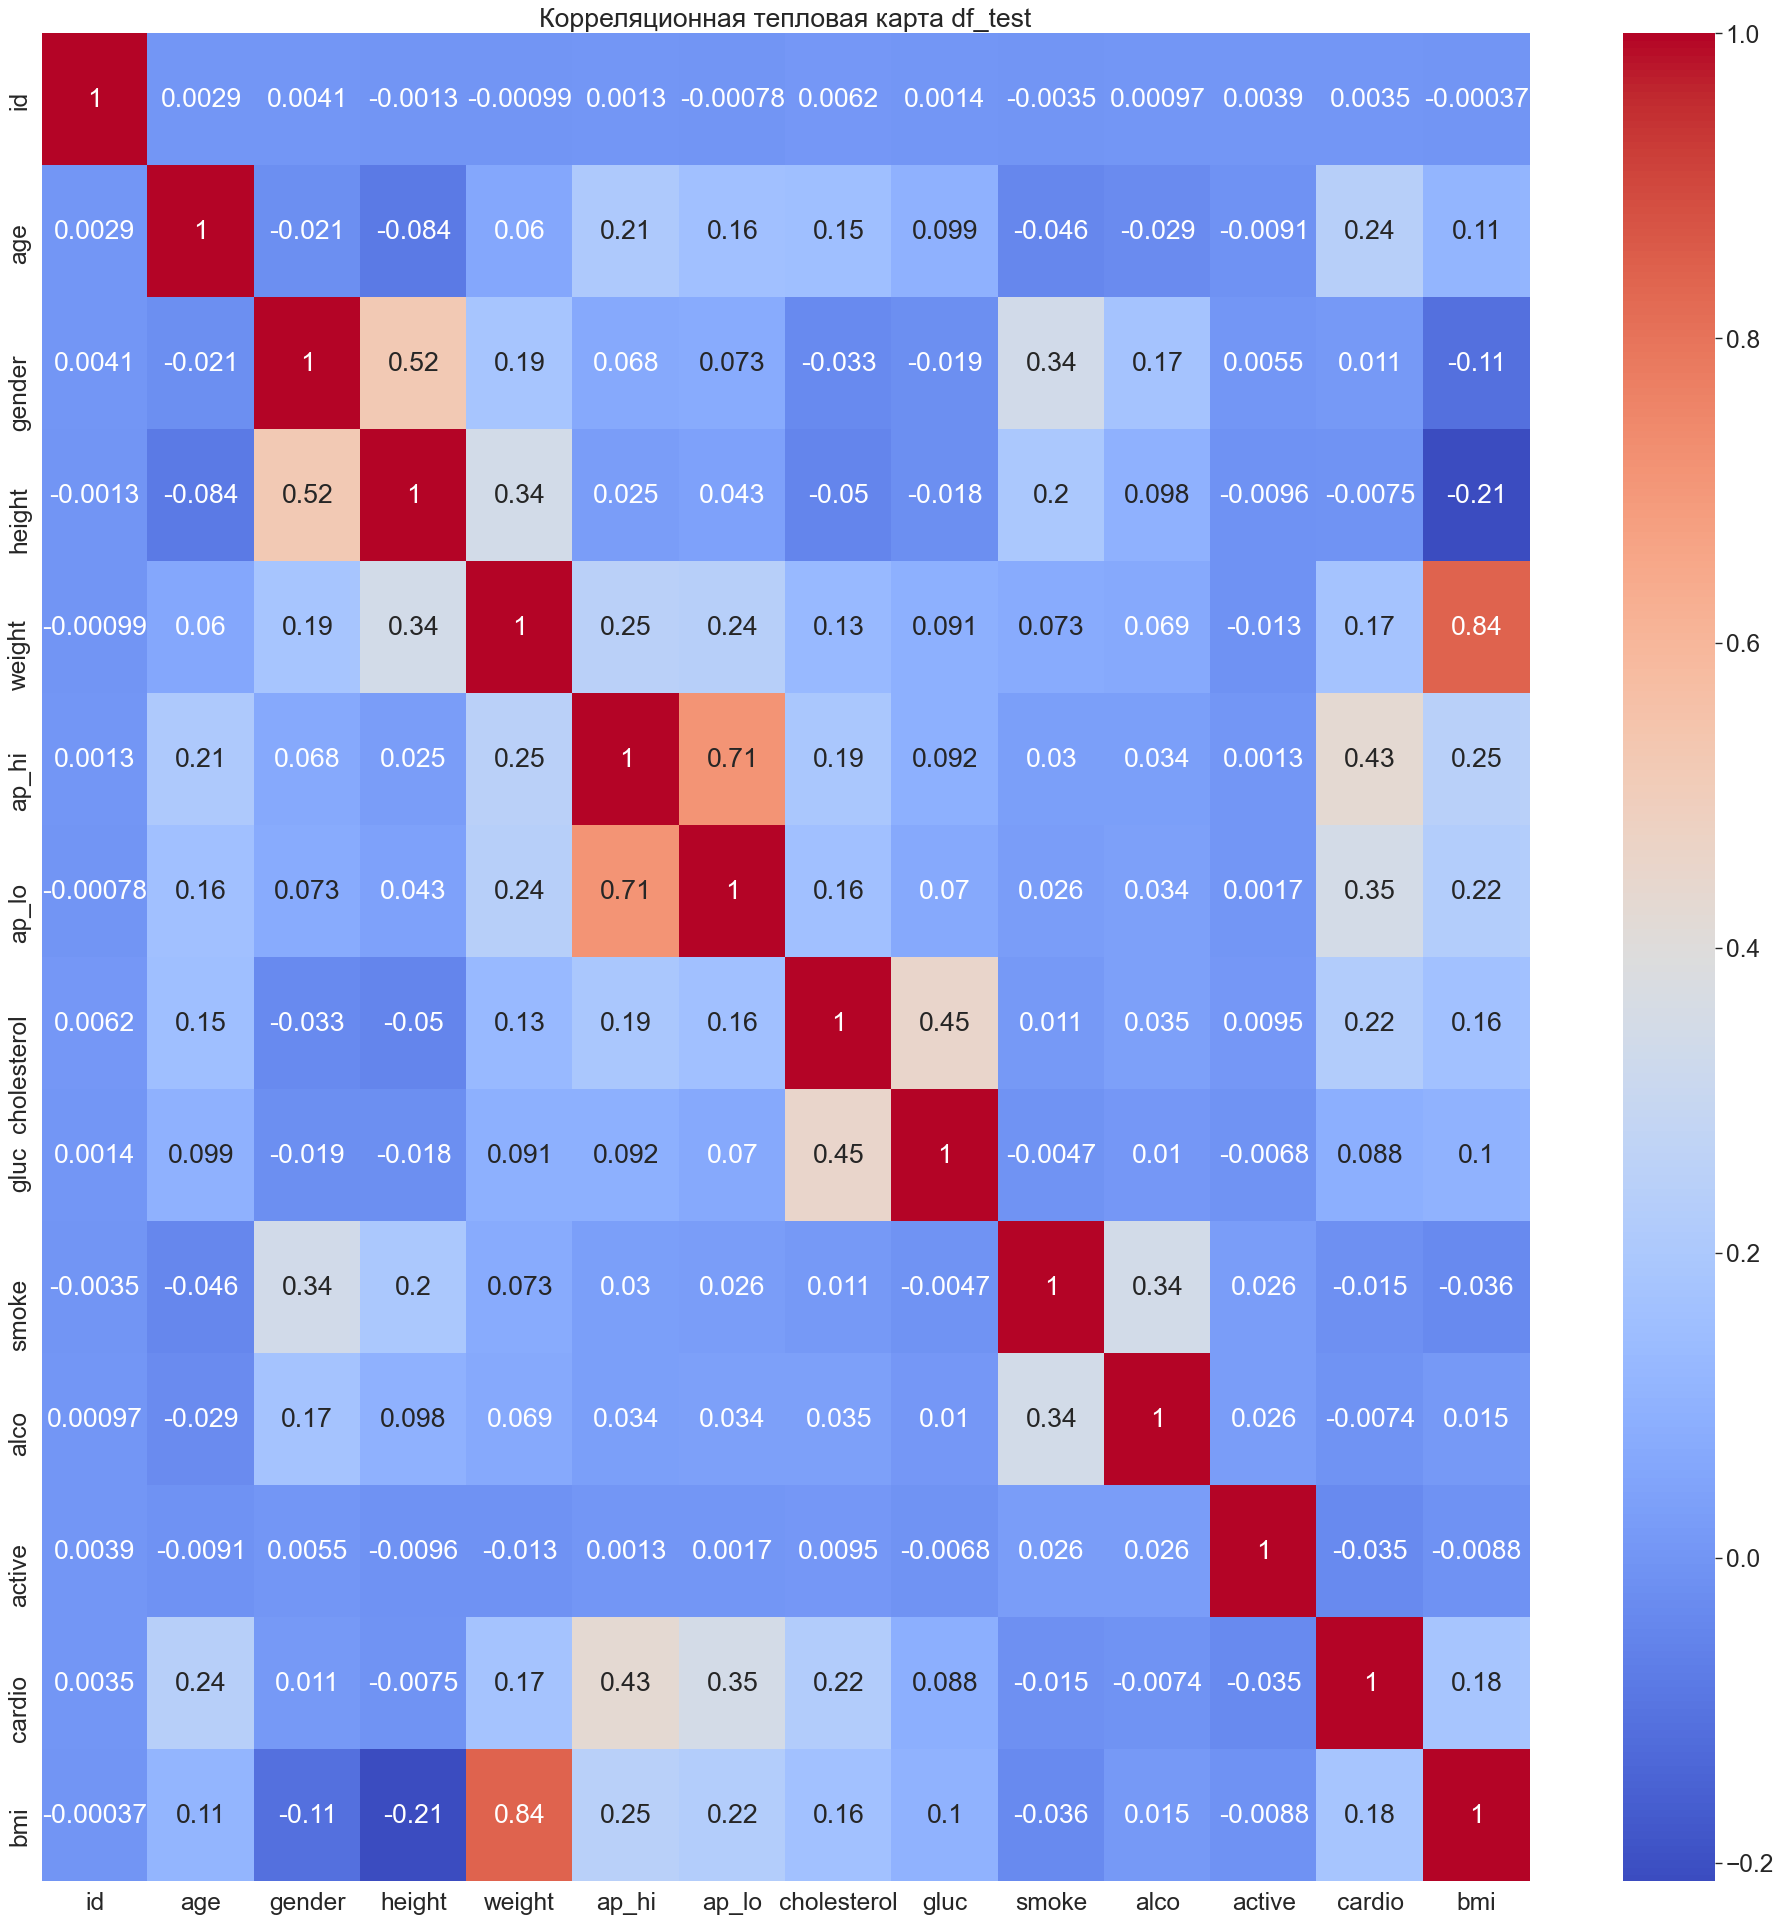

In [51]:
# Посмотрим на корреляцию

plt.figure(figsize=(30, 30))
sns.set(font_scale=2)
heatmap = sns.heatmap(df_train.corr(),
                      annot=True, cmap='coolwarm')
heatmap.set_title(
    'Корреляционная тепловая карта df_test')
plt.show()

Как видим большая корреляция между верним и нижним давлением, что естественно.
На корреляцию между весом и bmi не обращаем внимания, т.к. столбец bmi мы впоследствии удалим

In [52]:
#df_train['weight'] = df_train[['weight']].astype('int64')

In [53]:
# Удалим столбцы, в которых нет необходимости для модели

df_train.drop(columns=['bmi', 'id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [54]:
# Сбросим индексы

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [55]:
# Проверим дубликаты после удаления столбца id

df_train.duplicated().sum()

25

In [56]:
duplicat = df_train[df_train.duplicated()]
duplicat

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10415  20495       1  165.00   70.00 120.00  80.00            1     1      0   
21493  16793       1  165.00   68.00 120.00  80.00            1     1      0   
37979  18988       1  164.00   65.00 120.00  80.00            1     1      0   
39810  14552       1  158.00   64.00 120.00  80.00            1     1      0   
41867  18353       1  169.00   67.00 120.00  80.00            1     1      0   
44042  16937       2  170.00   70.00 120.00  80.00            1     1      0   
44505  21280       1  165.00   65.00 120.00  80.00            1     1      0   
45117  22077       1  175.00   69.00 120.00  80.00            1     1      0   
45179  21230       1  164.00   62.00 120.00  80.00            1     1      0   
48245  21945       1  165.00   60.00 120.00  80.00            1     1      0   
49741  17493       2  169.00   74.00 120.00  80.00            1     1      0   
51832  21943       1  165.00   65.00 120.00  80.00            1     1      0   
55861  17535       2  165.00   65.00 120.00  80.00            1     1      0   
56122  20293       1  162.00   70.00 110.00  70.00            1     1      0   
57151  18955       1  165.00   75.00 120.00  80.00            1     1      0   
57930  19858       1  165.00   68.00 120.00  80.00            1     1      0   
59633  20516       1  164.00   66.00 120.00  80.00            1     1      0   
59653  16805       1  157.00   67.00 120.00  80.00            1     1      0   
61465  18979       1  165.00   65.00 120.00  80.00            1     1      0   
63286  16160       1  168.00   65.00 120.00  80.00            1     1      0   
64181  18210       1  160.00   60.00 120.00  80.00            1     1      0   
64611  18240       1  165.00   67.00 120.00  80.00            1     1      0   
64720  21778       1  160.00   58.00 120.00  80.00            1     1      0   
65280  19059       1  165.00   65.00 120.00  80.00            1     1      0   
67335  21119       1  160.00   60.00 120.00  80.00            1     1      0   

       alco  active  cardio  
10415     0       1       0  
21493     0       1       0  
37979     0       1       0  
39810     0       1       0  
41867     0       1       0  
44042     0       0       0  
44505     0       1       0  
45117     0       1       1  
45179     0       1       0  
48245     0       1       0  
49741     0       1       1  
51832     0       1       1  
55861     0       1       0  
56122     0       1       0  
57151     0       1       1  
57930     0       1       0  
59633     0       0       0  
59653     0       1       0  
61465     0       0       0  
63286     0       1       1  
64181     0       1       0  
64611     0       1       0  
64720     0       1       0  
65280     0       1       1  
67335     0       0       1

Есть дубликаты, но они не полные, оставим все как есть

In [57]:
# Подготовим кросс-валидацию с 5 блоками применив StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [58]:
# Выделим целивой признак

target_train = df_train['cardio']
features_train = df_train.drop('cardio', axis=1)


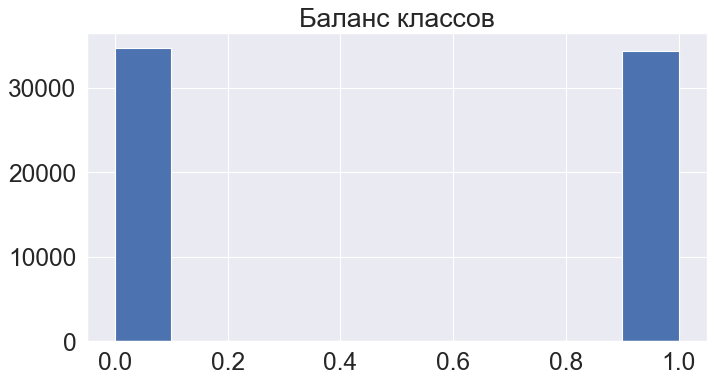

In [59]:
# Проверим дисбаланс классов

target_train.hist()
plt.title('Баланс классов')
#plt.xlabel('Класс')
#plt.ylabel('Количество')
plt.show()

In [60]:
target_train.value_counts(normalize=True)

0   0.50
1   0.50
Name: cardio, dtype: float64

In [61]:
# Список для сбора результатов

results = []

In [62]:
# Создадим pipeline c моделью DT

pipe_dt = make_pipeline(
    DecisionTreeClassifier(random_state=SEED)
)


In [63]:
# Подберем параметры с помощью RandomizedSearchCV (не использую GridSearchCV т.к. результаты 
# выдает в нашем случае одинаковые, но работает дольше)

parametrs_dt = {'max_depth': range(1, 15),
                'criterion': ['gini', 'entropy'],
                'class_weight': ['balanced', None],
                'min_samples_split': range(2, 100, 5),
                'min_samples_leaf': range(2, 100, 5),
              
                }

new_params_dt = {'decisiontreeclassifier__' +
                 key: parametrs_dt[key] for key in parametrs_dt}

In [64]:
rscv_dt = RandomizedSearchCV(pipe_dt, new_params_dt, scoring='roc_auc', cv=kf, random_state=SEED)

In [65]:
%%time
# Обучим модель и выведем результаты на экран

rscv_dt.fit(features_train, target_train)

CPU times: total: 10.7 s
Wall time: 11.4 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19221981, shuffle=True),
                   estimator=Pipeline(steps=[('decisiontreeclassifier',
                                              DecisionTreeClassifier(random_state=19221981))]),
                   param_distributions={'decisiontreeclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': range(1, 15),
                                        'decisiontreeclassifier__min_samples_leaf': range(2, 100, 5),
                                        'decisiontreeclassifier__min_samples_split': range(2, 100, 5)},
                   random_state=19221981, scoring='roc_auc')

In [66]:
print(f'Лучшие параметры модели DecisionTree: {rscv_dt.best_params_}')
print(f'ROC_AUC лучшей модели  DecisionTree: {rscv_dt.best_score_: .4f}')

Лучшие параметры модели DecisionTree: {'decisiontreeclassifier__min_samples_split': 22, 'decisiontreeclassifier__min_samples_leaf': 87, 'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': None}
ROC_AUC лучшей модели  DecisionTree:  0.7960


In [67]:
# Добаим результат в ранее созданный список

results.append(('DecisionTree', rscv_dt.best_score_))

In [68]:
pipe_rf = make_pipeline(RandomForestClassifier(random_state=SEED))

In [69]:
parametrs_rf = {'max_depth': range(1, 15),
                'criterion': ['gini', 'entropy'],
                'class_weight': ['balanced', None],
                'n_estimators': range(1, 40, 10),
                'max_features': ['sqrt'],
                'min_samples_split': range(2, 100, 5),
                'min_samples_leaf': range(2, 100, 5)
                }

new_params_rf = {'randomforestclassifier__' +
                 key: parametrs_rf[key] for key in parametrs_rf}

In [70]:
rscv_rf = RandomizedSearchCV(pipe_rf, new_params_rf, scoring='roc_auc', cv=kf, random_state=SEED)

In [71]:
%%time

rscv_rf.fit(features_train, target_train)

CPU times: total: 37.2 s
Wall time: 38.3 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19221981, shuffle=True),
                   estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier(random_state=19221981))]),
                   param_distributions={'randomforestclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': range(1, 15),
                                        'randomforestclassifier__max_features': ['sqrt'],
                                        'randomforestclassifier__min_samples_leaf': range(2, 100, 5),
                                        'randomforestclassifier__min_samples_split': range(2, 100, 5),
                                        'randomforestclassifier__n_estimators': range(1, 40, 10)},
                   random_state=19221981, scoring='roc_auc')

In [72]:
print(f'Лучшие параметры модели RandomForest: {rscv_rf.best_params_}')
print(f'ROC_AUC лучшей модели  RandomForest: {rscv_rf.best_score_: .4f}')

Лучшие параметры модели RandomForest: {'randomforestclassifier__n_estimators': 31, 'randomforestclassifier__min_samples_split': 27, 'randomforestclassifier__min_samples_leaf': 37, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 13, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__class_weight': None}
ROC_AUC лучшей модели  RandomForest:  0.8015


In [73]:
results.append(('RandomForest', rscv_rf.best_score_))

In [74]:
gbr_transformer = make_column_transformer(
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)


In [75]:
parametrs_gbr = {'max_depth': range(1, 15),
                'criterion':['friedman_mse', 'squared_error'],  
                #'learning_rate': [0.02, 0.05, 0.1, 0.2],                                                         
                'n_estimators': (1, 200, 10),
                'min_samples_split': range(2, 100, 5),
                'min_samples_leaf': range(2, 100, 5),
                'max_features': ['sqrt', 'auto', 'log2']
                }

new_params_gbr = {'gradientboostingclassifier__' +
                 key: parametrs_gbr[key] for key in parametrs_gbr}


In [76]:
pipe_gbr = make_pipeline(GradientBoostingClassifier(random_state=SEED))
rscv_gbr = RandomizedSearchCV(pipe_gbr, new_params_gbr, scoring='roc_auc', cv=kf, random_state=SEED)


In [77]:
%%time

rscv_gbr.fit(features_train, target_train)

CPU times: total: 4min 35s
Wall time: 4min 41s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19221981, shuffle=True),
                   estimator=Pipeline(steps=[('gradientboostingclassifier',
                                              GradientBoostingClassifier(random_state=19221981))]),
                   param_distributions={'gradientboostingclassifier__criterion': ['friedman_mse',
                                                                                  'squared_error'],
                                        'gradientboostingclassifier__max_depth': range(1, 15),
                                        'gradientboostingclassifier__max_features': ['sqrt'],
                                        'gradientboostingclassifier__min_samples_leaf': range(2, 100, 5),
                                        'gradientboostingclassifier__min_samples_split': range(2, 100, 5),
                                        'gradientboostingclassifier__n_estimators': (1,
                                                                                     200,
                                                                                     10)},
                   random_state=19221981, scoring='roc_auc')

In [78]:
print(f'Лучшие параметры модели GradientBoostingt: {rscv_gbr.best_params_}')
print(f'ROC_AUC лучшей модели  GradientBoostingt: {rscv_gbr.best_score_: .4f}')


Лучшие параметры модели GradientBoostingt: {'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__min_samples_split': 7, 'gradientboostingclassifier__min_samples_leaf': 97, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__criterion': 'squared_error'}
ROC_AUC лучшей модели  GradientBoostingt:  0.8023


In [79]:
results.append(('GradientBoosting', rscv_gbr.best_score_))


In [80]:
linear_transformer = make_column_transformer(
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)


In [81]:
pipe_lr = make_pipeline(
    linear_transformer,
    LogisticRegression(
        random_state=SEED,
    )
)

In [82]:
parametrs_lr = {'class_weight': ['balanced', None],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'C': [.001, .01],
                'max_iter': [200]
                }

new_params_lr = {'logisticregression__' +
                 key: parametrs_lr[key] for key in parametrs_lr}
rscv_lr = RandomizedSearchCV(
    pipe_lr, new_params_lr, scoring='roc_auc', cv=kf, random_state=SEED)

In [83]:
%%time

rscv_lr.fit(features_train, target_train)

CPU times: total: 19.1 s
Wall time: 18.3 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19221981, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002B43B051A90>)])),
                                             ('logisticregression',
                                              LogisticRegression(random_state=19221981))]),
                   param_distributions={'logisticregression__C': [0.001, 0.01],
                                        'logisticregression__class_weight': ['balanced',
                                                                             None],
                                        'logisticregression__max_iter': [200],
                                        'logisticregression__solver': ['newton-cg',
                                                                       'lbfgs',
                                                                       'liblinear',
                                                                       'sag',
                                                                       'saga']},
                   random_state=19221981, scoring='roc_auc')

In [84]:
print(f'Лучшие параметры модели LogisticRegression: {rscv_lr.best_params_}')
print(f'ROC_AUC лучшей модели  LogisticRegression: {rscv_lr.best_score_: .4f}')  

Лучшие параметры модели LogisticRegression: {'logisticregression__solver': 'lbfgs', 'logisticregression__max_iter': 200, 'logisticregression__class_weight': None, 'logisticregression__C': 0.01}
ROC_AUC лучшей модели  LogisticRegression:  0.7920


In [85]:
results.append(('LogisticRegression', rscv_lr.best_score_))

In [86]:
# Выведем результаты на экран

pd.set_option('display.float_format', '{:,.4f}'.format)
results_df = pd.DataFrame(results, columns=['model', 'roc_auc_score'])
display(results_df[['model', 'roc_auc_score']])

model  roc_auc_score
0        DecisionTree         0.7960
1        RandomForest         0.8015
2    GradientBoosting         0.8023
3  LogisticRegression         0.7920

In [87]:
# Посчитаем вероятность

gbr_probs = rscv_gbr.predict_proba(df_test)[:, 1]


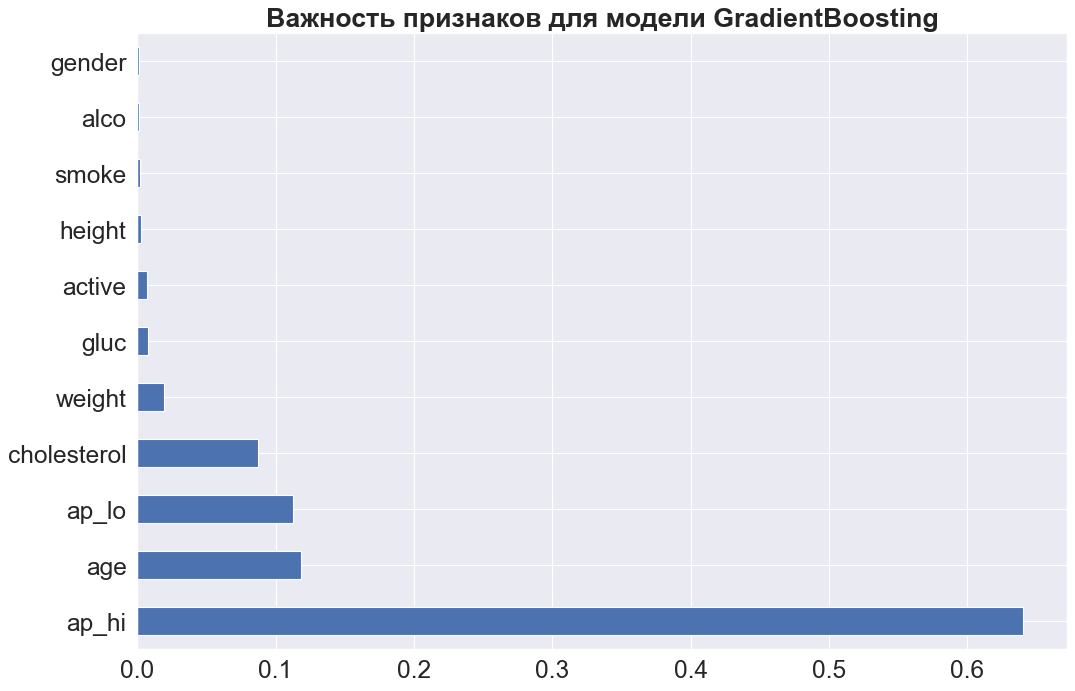

In [88]:
# Посмотрим важные признаки для нашей модели

feature_importances = rscv_gbr.best_estimator_._final_estimator.feature_importances_

plt.figure(figsize=(15, 10))
pd.Series(feature_importances, df_test.columns).nlargest(15).plot(kind='barh')
plt.title('Важность признаков для модели GradientBoosting', weight = 'bold')
plt.show()

In [89]:
df_test_1 = pd.read_csv('C:/Users/User/Desktop/Kaggle/test.csv')
df_test_1['cardio'] = gbr_probs
df_test_1 = df_test_1[['id', 'cardio']]
df_test_1.to_csv('C:/Users/User/Desktop/Kaggle/submission.csv', index=False)
df_test_1


id  cardio
0          5  0.5050
1          6  0.5571
2          7  0.3983
3         10  0.5429
4         11  0.2236
...      ...     ...
29995  99984  0.8612
29996  99987  0.1889
29997  99989  0.4386
29998  99994  0.3142
29999  99997  0.6601

[30000 rows x 2 columns]

In [90]:
# Сохраним модель

with open('C:/Users/User/Desktop/Kaggle/rscv_gbr.pcl', 'ab') as fid:
    dump(rscv_gbr, fid)
